In [102]:
from spuco.datasets import WILDSDatasetWrapper, SpuCoAnimals, UrbanCars, SpuCoSun, SpuCoMNIST

In [165]:
from wilds import get_dataset 

transform=None
dataset = get_dataset(dataset="waterbirds", download=False, root_dir="/home/data")
train_data = dataset.get_subset(
        "train",
        transform=transform
    )
val_data = dataset.get_subset(
    "val",
    transform=transform
)
test_data = dataset.get_subset(
    "test",
    transform=transform
)
trainset = WILDSDatasetWrapper(dataset=train_data, metadata_spurious_label="background", verbose=True)
valset = WILDSDatasetWrapper(dataset=val_data, metadata_spurious_label="background", verbose=True)
testset = WILDSDatasetWrapper(dataset=test_data, metadata_spurious_label="background", verbose=True)

Partitioning data indices into groups: 100%|██████████| 5794/5794 [00:00<00:00, 59017.32it/s]


In [166]:
print("train_data", len(trainset))
print("val_data", len(valset))

train_data 4795
val_data 1199


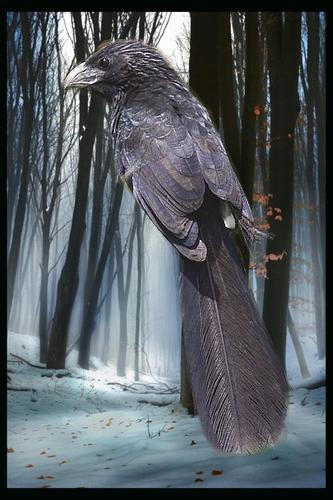

In [167]:
trainset[trainset.group_partition[(0,0)][0]][0]

In [168]:
sizes = {}
for key in sorted(trainset.group_partition.keys()):
    sizes[key] = len(trainset.group_partition[key]) / len(trainset)
    print(key, sizes[key])

(0, 0) 0.7295099061522419
(0, 1) 0.0383733055265902
(1, 0) 0.01167883211678832
(1, 1) 0.22043795620437956


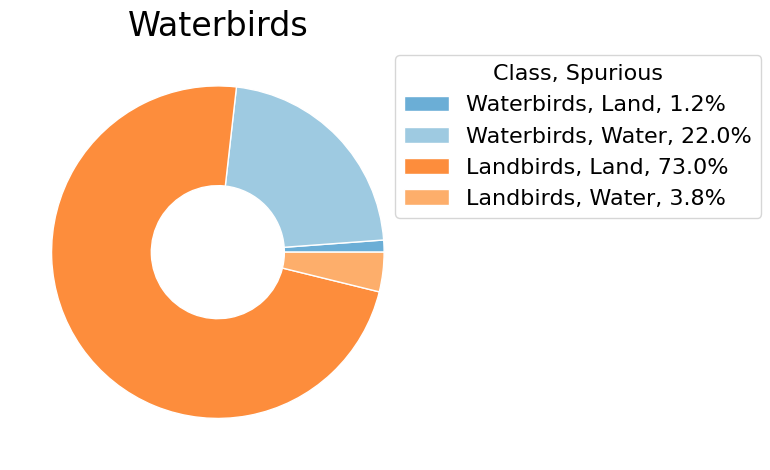

In [169]:
import matplotlib.pyplot as plt
import numpy as np

title="Waterbirds"

vals = []
num_classes = 2
num_spurious = 2 
for i in range(num_classes)[::-1]:
    vals.append([])
    for j in range(num_spurious):
        if key in sizes:
            vals[-1].append(sizes[(i, j)])
vals = np.array(vals)

# Adjust the figure size
#    fig, ax = plt.subplots(figsize=(4,4))
size = 0.6

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3) * 4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

#outer = plt.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
#                wedgeprops=dict(width=size, edgecolor='w'))

inner = plt.pie(vals.flatten(), radius=1, colors=inner_colors,
                wedgeprops=dict(width=size, edgecolor='w'))

#plt.set(aspect="equal", title=title)
# Add legends without labels on the pie chart
plt.title(title, fontsize=24)
plt.tight_layout()
plt.legend(handles=inner[0], labels=["Waterbirds, Land, 1.2%", "Waterbirds, Water, 22.0%", "Landbirds, Land, 73.0%", "Landbirds, Water, 3.8%"], title='Class, Spurious', bbox_to_anchor=(0.9, 1), loc='upper left', title_fontsize=16, fontsize=16)
#legends.append(ax.legend(handles=inner[0][2:], labels=["Water", "Land"], title='Waterbirds', loc='upper left'))

plt.savefig("waterbirds_sizes.pdf", bbox_inches='tight')


Partitioning data indices into groups: 100%|██████████| 19962/19962 [00:00<00:00, 147603.91it/s]


train_data 162770
val_data 19867
(0, 0) 0.4400626651102783
(0, 1) 0.4108496651717147
(1, 0) 0.1405664434478098
(1, 1) 0.008521226270197212


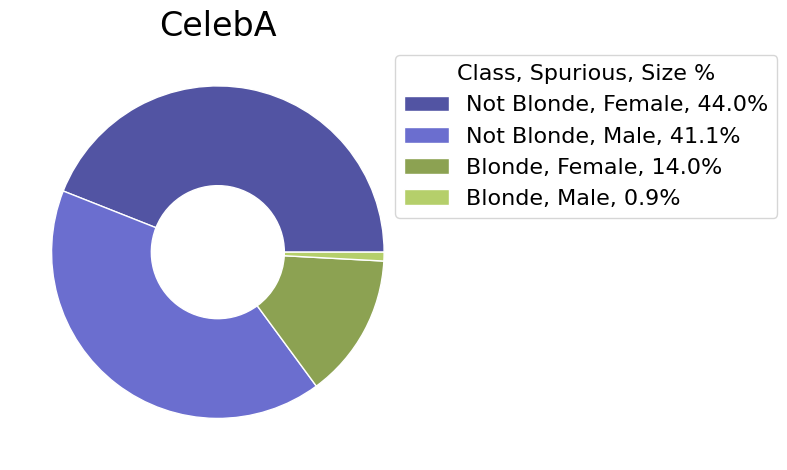

In [170]:
dataset = get_dataset(dataset="celebA", download=False, root_dir="/home/data")
train_data = dataset.get_subset(
        "train",
        transform=transform
    )
val_data = dataset.get_subset(
    "val",
    transform=transform
)
test_data = dataset.get_subset(
    "test",
    transform=transform
)
trainset = WILDSDatasetWrapper(dataset=train_data, metadata_spurious_label="male", verbose=True)
valset = WILDSDatasetWrapper(dataset=val_data, metadata_spurious_label="male", verbose=True)
testset = WILDSDatasetWrapper(dataset=test_data, metadata_spurious_label="male", verbose=True)

print("train_data", len(trainset))
print("val_data", len(valset))

sizes = {}
for key in sorted(trainset.group_partition.keys()):
    sizes[key] = len(trainset.group_partition[key]) / len(trainset)
    print(key, sizes[key])

import matplotlib.pyplot as plt
import numpy as np

title="CelebA"

vals = []
num_classes = 2
num_spurious = 2 
for i in range(num_classes):
    vals.append([])
    for j in range(num_spurious):
        if key in sizes:
            vals[-1].append(sizes[(i, j)])
vals = np.array(vals)

# Adjust the figure size
#    fig, ax = plt.subplots(figsize=(4,4))
size = 0.6

cmap = plt.colormaps["tab20b"]
outer_colors = cmap(np.arange(3) * 4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

#outer = plt.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
#                wedgeprops=dict(width=size, edgecolor='w'))

inner = plt.pie(vals.flatten(), radius=1, colors=inner_colors,
                wedgeprops=dict(width=size, edgecolor='w'))

#plt.set(aspect="equal", title=title)
# Add legends without labels on the pie chart
plt.title(title, fontsize=24)
plt.tight_layout()
plt.legend(handles=inner[0], labels=["Not Blonde, Female, 44.0%", "Not Blonde, Male, 41.1%", "Blonde, Female, 14.0%", "Blonde, Male, 0.9%"], title='Class, Spurious, Size %', bbox_to_anchor=(0.9, 1), loc='upper left', title_fontsize=16, fontsize=16)
#legends.append(ax.legend(handles=inner[0][2:], labels=["Water", "Land"], title='Waterbirds', loc='upper left'))

plt.savefig("celeba_sizes.pdf", bbox_inches='tight')


In [171]:
from spuco.datasets import  UrbanCars, UrbanCarsSpuriousLabel

trainset=UrbanCars(root="/data/urbancars/", split="train", spurious_label_type=UrbanCarsSpuriousLabel.BOTH, verbose=True, transform=transform)
trainset.initialize()
valset=UrbanCars(root="/data/urbancars/", split="val", spurious_label_type=UrbanCarsSpuriousLabel.BOTH, verbose=True, transform=transform)
valset.initialize()
testset=UrbanCars(root="/data/urbancars/", split="test", spurious_label_type=UrbanCarsSpuriousLabel.BOTH, verbose=True, transform=transform)
testset.initialize()

Loading dataset


Creating group partitions: 100%|██████████| 7989/7989 [00:00<00:00, 662337.07it/s]


Computing group weights
Done!
Loading dataset


Creating group partitions: 100%|██████████| 999/999 [00:00<00:00, 740040.57it/s]


Computing group weights
Done!
Loading dataset


Creating group partitions: 100%|██████████| 1000/1000 [00:00<00:00, 460154.03it/s]

Computing group weights
Done!


In [172]:
print("train_data", len(trainset))
print("val_data", len(valset))

sizes = {}
for key in sorted(trainset.group_partition.keys()):
    sizes[key] = len(trainset.group_partition[key]) / len(trainset)
    print(key, sizes[key])
print(sizes)
import matplotlib.pyplot as plt
import numpy as np

title="UrbanCars"

outer_sizes = [0.5, 0.5]
middle_sizes = [0.475, 0.0245, 0.0245, 0.475]
inner_sizes = list(sizes.values())
print(inner_sizes)

train_data 7989
val_data 999
(0, (0, 0)) 0.45124546251095254
(0, (0, 1)) 0.02365752910251596
(0, (1, 0)) 0.02365752910251596
(0, (1, 1)) 0.001251721116535236
(1, (0, 0)) 0.001251721116535236
(1, (0, 1)) 0.023782701214169484
(1, (1, 0)) 0.023782701214169484
(1, (1, 1)) 0.45137063462260607
{(0, (0, 0)): 0.45124546251095254, (0, (0, 1)): 0.02365752910251596, (0, (1, 0)): 0.02365752910251596, (0, (1, 1)): 0.001251721116535236, (1, (0, 0)): 0.001251721116535236, (1, (0, 1)): 0.023782701214169484, (1, (1, 0)): 0.023782701214169484, (1, (1, 1)): 0.45137063462260607}
[0.45124546251095254, 0.02365752910251596, 0.02365752910251596, 0.001251721116535236, 0.001251721116535236, 0.023782701214169484, 0.023782701214169484, 0.45137063462260607]


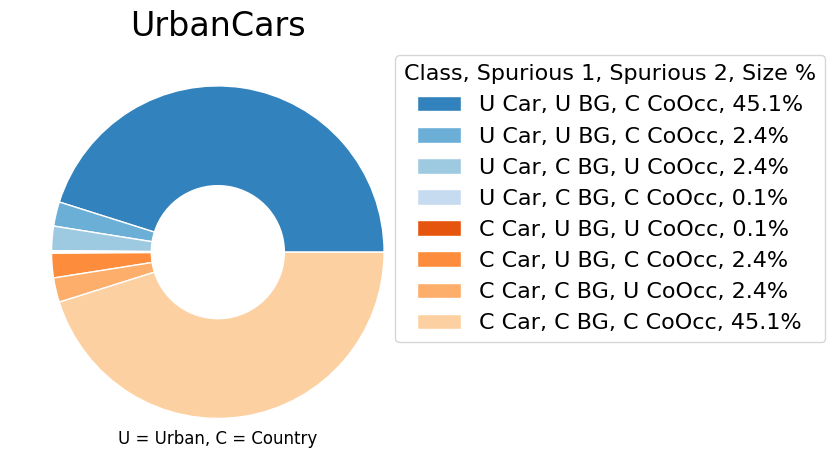

In [173]:

# Adjust the figure size
#    fig, ax = plt.subplots(figsize=(4,4))
size = 0.6

cmap = plt.colormaps["tab20c"]
outer_colors = cmap([0, 4])
middle_colors = cmap([0, 1, 4, 5])
inner_colors = cmap([0, 1, 2, 3, 4, 5, 6, 7])

#outer = plt.pie(outer_sizes, radius=1, colors=outer_colors,
#                wedgeprops=dict(width=size, edgecolor='w'))
#middle = plt.pie(middle_sizes, radius=1 - size, colors=middle_colors,
#                wedgeprops=dict(width=size, edgecolor='w'))
inner = plt.pie(inner_sizes, radius=1, colors=inner_colors,
                wedgeprops=dict(width=size, edgecolor='w'))

#plt.set(aspect="equal", title=title)
# Add legends without labels on the pie chart
plt.title(title, fontsize=24)
plt.text(0.5, 0.05, 'U = Urban, C = Country', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.tight_layout()
plt.legend(handles=inner[0], 
labels=["U Car, U BG, C CoOcc, 45.1%", "U Car, U BG, C CoOcc, 2.4%", "U Car, C BG, U CoOcc, 2.4%" , "U Car, C BG, C CoOcc, 0.1%", "C Car, U BG, U CoOcc, 0.1%", "C Car, U BG, C CoOcc, 2.4%", "C Car, C BG, U CoOcc, 2.4%" , "C Car, C BG, C CoOcc, 45.1%"], title='Class, Spurious 1, Spurious 2, Size %', bbox_to_anchor=(0.9, 1), loc='upper left', title_fontsize=16, fontsize=16)
#legends.append(ax.legend(handles=inner[0][2:], labels=["Water", "Land"], title='Waterbirds', loc='upper left'))

plt.savefig(f"{title.lower()}_sizes.pdf", bbox_inches='tight')


In [174]:
from spuco.datasets import SpuCoAnimals

trainset = SpuCoAnimals(
    root="/data",
    label_noise=0,
    split="train",
    transform=transform,
)
trainset.initialize()

valset = SpuCoAnimals(
    root="/data",
    label_noise=0,
    split="val",
    transform=transform,
)
valset.initialize()

testset = SpuCoAnimals(
    root="/data",
    label_noise=0,
    split="test",
    transform=transform,
)
testset.initialize()


train_data 42000
val_data 2100
(0, 0) 0.23809523809523808
(0, 1) 0.011904761904761904
(1, 0) 0.011904761904761904
(1, 1) 0.23809523809523808
(2, 2) 0.23809523809523808
(2, 3) 0.011904761904761904
(3, 2) 0.011904761904761904
(3, 3) 0.23809523809523808
{(0, 0): 0.23809523809523808, (0, 1): 0.011904761904761904, (1, 0): 0.011904761904761904, (1, 1): 0.23809523809523808, (2, 2): 0.23809523809523808, (2, 3): 0.011904761904761904, (3, 2): 0.011904761904761904, (3, 3): 0.23809523809523808}


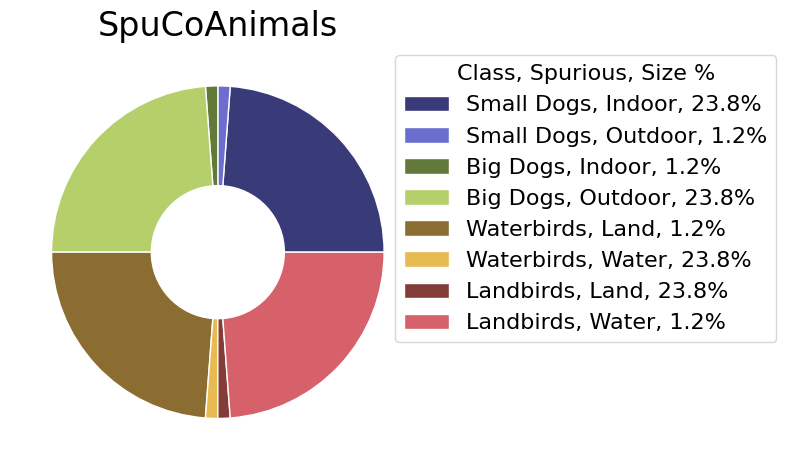

In [175]:
print("train_data", len(trainset))
print("val_data", len(valset))

sizes = {}
for key in sorted(trainset.group_partition.keys()):
    sizes[key] = len(trainset.group_partition[key]) / len(trainset)
    print(key, sizes[key])
print(sizes)
import matplotlib.pyplot as plt
import numpy as np

title="SpuCoAnimals"

outer_sizes = [0.25, 0.25, 0.25, 0.25]
inner_sizes = list(sizes.values())

# Adjust the figure size
#    fig, ax = plt.subplots(figsize=(4,4))
size = 0.6

cmap = plt.colormaps["tab20b"]
outer_colors = cmap([0, 4, 8, 12])
inner_colors = cmap([0, 2, 4, 6, 8, 10, 12, 14])

# outer = plt.pie(outer_sizes, radius=1, colors=outer_colors,
#                 wedgeprops=dict(width=size, edgecolor='w'))
inner = plt.pie(inner_sizes, radius=1, colors=inner_colors,
                wedgeprops=dict(width=size, edgecolor='w'))

#plt.set(aspect="equal", title=title)
# Add legends without labels on the pie chart
plt.title(title, fontsize=24)
plt.tight_layout()
plt.legend(handles=inner[0], 
labels=["Small Dogs, Indoor, 23.8%", "Small Dogs, Outdoor, 1.2%", "Big Dogs, Indoor, 1.2%", "Big Dogs, Outdoor, 23.8%", "Waterbirds, Land, 1.2%", "Waterbirds, Water, 23.8%", "Landbirds, Land, 23.8%", "Landbirds, Water, 1.2%"], title="Class, Spurious, Size %", bbox_to_anchor=(0.9, 1), loc='upper left', title_fontsize=16, fontsize=16)
#legends.append(ax.legend(handles=inner[0][2:], labels=["Water", "Land"], title='Waterbirds', loc='upper left'))

plt.savefig(f"{title.lower()}_sizes.pdf", bbox_inches='tight')


In [176]:
from spuco.datasets import SpuCoMNIST, SpuriousFeatureDifficulty 

# Load the full dataset, and download it if necepdery
classes = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
trainset = SpuCoMNIST(
    root="/data/mnist",
    spurious_feature_difficulty=SpuriousFeatureDifficulty.MAGNITUDE_LARGE,
    spurious_correlation_strength=0.995,
    classes=classes,
    split="train"
)
trainset.initialize()
testset = SpuCoMNIST(
    root="/data/mnist", 
    spurious_feature_difficulty=SpuriousFeatureDifficulty.MAGNITUDE_LARGE,
    classes=classes,
    split="test"
)
testset.initialize()
valset = SpuCoMNIST(
    root="/data/mnist",
    spurious_feature_difficulty=SpuriousFeatureDifficulty.MAGNITUDE_LARGE,
    classes=classes,
    split="val"
)

In [177]:
from torchvision.transforms import ToPILImage 
t = ToPILImage()
t(trainset[trainset.group_partition[(4,4)][0]][0])

In [178]:
sum(sizes.values())

1.0

train_data 48004
val_data 11996
(0, 0) 0.2100241646529456
(0, 1) 0.0002708107657695192
(0, 2) 0.00018748437630197485
(0, 3) 0.0002499791684026331
(0, 4) 0.0003541371552370636
(1, 0) 0.00018748437630197485
(1, 1) 0.20046246146154487
(1, 2) 0.0002916423631364053
(1, 3) 0.0003333055578701775
(1, 4) 0.00020831597366886094
(2, 0) 0.0003333055578701775
(2, 1) 0.00022914757103574703
(2, 2) 0.1867552703941338
(2, 3) 0.00022914757103574703
(2, 4) 0.00016665277893508876
(3, 0) 0.0002916423631364053
(3, 1) 0.0003333055578701775
(3, 2) 0.00022914757103574703
(3, 3) 0.20202483126406132
(3, 4) 0.00016665277893508876
(4, 0) 0.00018748437630197485
(4, 1) 0.0002499791684026331
(4, 2) 0.0003124739605032914
(4, 3) 0.0002499791684026331
(4, 4) 0.19567119406716107
{(0, 0): 0.2100241646529456, (0, 1): 0.0002708107657695192, (0, 2): 0.00018748437630197485, (0, 3): 0.0002499791684026331, (0, 4): 0.0003541371552370636, (1, 0): 0.00018748437630197485, (1, 1): 0.20046246146154487, (1, 2): 0.0002916423631364053, 

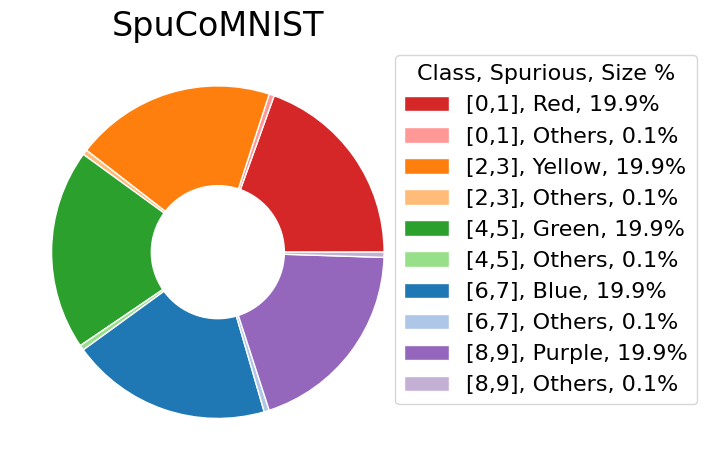

In [183]:
print("train_data", len(trainset))
print("val_data", 60000 - len(trainset))

sizes = {}
for key in sorted(trainset.group_partition.keys()):
    sizes[key] = len(trainset.group_partition[key]) / len(trainset)
    print(key, sizes[key])
print(sizes)
import matplotlib.pyplot as plt
import numpy as np

title="SpuCoMNIST"

outer_sizes = [0.2, 0.2, 0.2, 0.2, 0.2]
inner_sizes = [0.195, 0.005, 0.195, 0.005, 0.195, 0.005, 0.195, 0.005, 0.195, 0.005]

# Adjust the figure size
#    fig, ax = plt.subplots(figsize=(4,4))
size = 0.6

cmap = plt.colormaps["tab20"]
inner_colors = cmap([6, 7, 2, 3, 4, 5, 0, 1, 8, 9])

inner = plt.pie(inner_sizes, radius=1, colors=inner_colors,
                wedgeprops=dict(width=size, edgecolor='w'))

#plt.set(aspect="equal", title=title)
# Add legends without labels on the pie chart
plt.title(title, fontsize=24)
plt.tight_layout()
plt.legend(handles=inner[0], 
labels=["[0,1], Red, 19.9%", "[0,1], Others, 0.1%", "[2,3], Yellow, 19.9%", "[2,3], Others, 0.1%", "[4,5], Green, 19.9%", "[4,5], Others, 0.1%", "[6,7], Blue, 19.9%", "[6,7], Others, 0.1%", "[8,9], Purple, 19.9%", "[8,9], Others, 0.1%"], title='Class, Spurious, Size %', bbox_to_anchor=(0.9, 1), loc='upper left', title_fontsize=16, fontsize=16)
#legends.append(ax.legend(handles=inner[0][2:], labels=["Water", "Land"], title='Waterbirds', loc='upper left'))

plt.savefig(f"{title.lower()}_sizes.pdf", bbox_inches='tight')


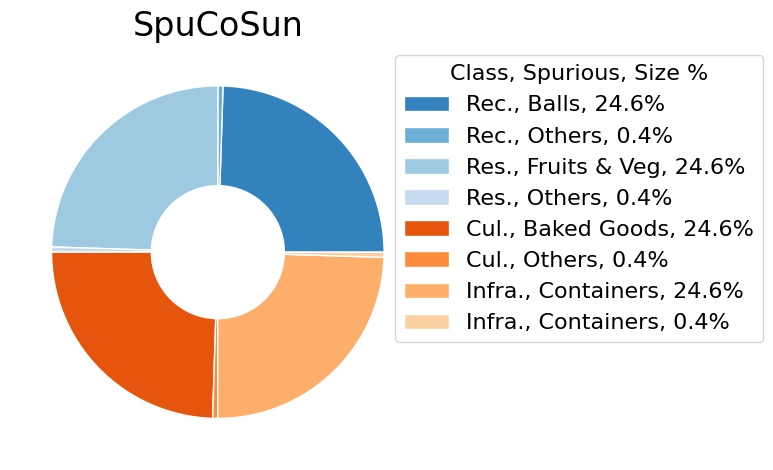

In [184]:
title="SpuCoSun"

outer_sizes = [0.2, 0.2, 0.2, 0.2, 0.2]
inner_sizes = [0.245, 0.005, 0.245, 0.005, 0.245, 0.005, 0.245, 0.005]

# Adjust the figure size
#    fig, ax = plt.subplots(figsize=(4,4))
size = 0.6

cmap = plt.colormaps["tab20c"]
inner_colors = cmap(np.arange(10))

inner = plt.pie(inner_sizes, radius=1, colors=inner_colors,
                wedgeprops=dict(width=size, edgecolor='w'))

#plt.set(aspect="equal", title=title)
# Add legends without labels on the pie chart
plt.title(title, fontsize=24)
plt.tight_layout()
plt.legend(handles=inner[0], 
labels=["Rec., Balls, 24.6%", "Rec., Others, 0.4%", "Res., Fruits & Veg, 24.6%", "Res., Others, 0.4%", "Cul., Baked Goods, 24.6%", "Cul., Others, 0.4%", "Infra., Containers, 24.6%", "Infra., Containers, 0.4%"],
title='Class, Spurious, Size %', bbox_to_anchor=(0.9, 1), loc='upper left', title_fontsize=16, fontsize=16)
#legends.append(ax.legend(handles=inner[0][2:], labels=["Water", "Land"], title='Waterbirds', loc='upper left'))

plt.savefig(f"{title.lower()}_sizes.pdf", bbox_inches='tight')


In [26]:
import numpy as np 

data = [
    {"Method": "ERM", "Waterbirds": {"WG": 80.1, "Average": 97.8}, "CelebA": {"WG": 79.4, "Average": 91.7}, "UrbanCars": {"WG": 56.8, "Average": 97.0}, "SpuCoAnimals (CLIP)": {"WG": 45.4, "Average": 76.8}, "SpuCoSun (Hard)": {"WG": 20.2, "Average": 66.0}, "SpuCoMNIST (High)": {"WG": 44.3, "Average": 99.8}},
    {"Method": "EIIL", "Waterbirds": {"WG": 83.5, "Average": 94.2}, "CelebA": {"WG": "F", "Average": "F"}, "UrbanCars": {"WG": 79.2, "Average": 91.5}, "SpuCoAnimals (CLIP)": {"WG": "R", "Average": "R"}, "SpuCoSun (Hard)": {"WG": 32.1, "Average": 80.9}, "SpuCoMNIST (High)": {"WG": 43.7, "Average": 99.7}},
    {"Method": "JTT", "Waterbirds": {"WG": 83.1, "Average": 90.6}, "CelebA": {"WG": "F", "Average": "F"}, "UrbanCars": {"WG": 76.0, "Average": 91.8}, "SpuCoAnimals (CLIP)": {"WG": "R", "Average": "R"}, "SpuCoSun (Hard)": {"WG": "HY", "Average": "HY"}, "SpuCoMNIST (High)": {"WG": 75.1, "Average": 97.7}},
    {"Method": "SPARE", "Waterbirds": {"WG": 91.6, "Average": 96.2}, "CelebA": {"WG": "YX", "Average": "YX"}, "UrbanCars": {"WG": 76.0, "Average": 96.1}, "SpuCoAnimals (CLIP)": {"WG": 23.2, "Average": 94.7}, "SpuCoSun (Hard)": {"WG": 40.5, "Average": 79.7}, "SpuCoMNIST (High)": {"WG": 94.1, "Average": 97.7}},
    {"Method": "SSA", "Waterbirds": {"WG": 85.1, "Average": 96.7}, "CelebA": {"WG": 89.8, "Average": 91.0}, "UrbanCars": {"WG": "YY", "Average": "YY"}, "SpuCoAnimals (CLIP)": {"WG": 50.4, "Average": 89.7}, "SpuCoSun (Hard)": {"WG": 22.6, "Average": 39.2}, "SpuCoMNIST (High)": {"WG": 97.1, "Average": 92.2}},
    {"Method": "DFR^Val_Tr", "Waterbirds": {"WG": 90.6, "Average": 93.4}, "CelebA": {"WG": 88.3, "Average": 91.3}, "UrbanCars": {"WG": 79.2, "Average": 92.6}, "SpuCoAnimals (CLIP)": {"WG": 63.6, "Average": 85.1}, "SpuCoSun (Hard)": {"WG": 38.1, "Average": 67.9}, "SpuCoMNIST (High)": {"WG": 92.0, "Average": 98.1}},
    {"Method": "DISPEL", "Waterbirds": {"WG": 92.7, "Average": 94.4}, "CelebA": {"WG": 88.5, "Average": 91.0}, "UrbanCars": {"WG": 80.0, "Average": 92.2}, "SpuCoAnimals (CLIP)": {"WG": "R", "Average": "R"}, "SpuCoSun (Hard)": {"WG": 41.6, "Average": 77.4}, "SpuCoMNIST (High)": {"WG": 92.5, "Average": 98.2}},
    {"Method": "GB", "Waterbirds": {"WG": 88.1, "Average": 95.5}, "CelebA": {"WG": "F", "Average": "F"}, "UrbanCars": {"WG": 84.8, "Average": 93.3}, "SpuCoAnimals (CLIP)": {"WG": "R", "Average": "R"}, "SpuCoSun (Hard)": {"WG": 46.4, "Average": 73.2}, "SpuCoMNIST (High)": {"WG": 92.2, "Average": 96.2}},
    {"Method": "GDRO", "Waterbirds": {"WG": 85.7, "Average": 94.3}, "CelebA": {"WG": 89.4, "Average": 91.4}, "UrbanCars": {"WG": 80.0, "Average": 90.9}, "SpuCoAnimals (CLIP)": {"WG": 54.0, "Average": 72.4}, "SpuCoSun (Hard)": {"WG": 47.6, "Average": 73.4}, "SpuCoMNIST (High)": {"WG": 91.4, "Average": 96.9}},
    {"Method": "PDE", "Waterbirds": {"WG": 90.3, "Average": 92.4}, "CelebA": {"WG": 91.0, "Average": 92.0}, "UrbanCars": {"WG": "YY", "Average": "YY"}, "SpuCoAnimals (CLIP)": {"WG": 70.6, "Average": 81.5}, "SpuCoSun (Hard)": {"WG": 56.0, "Average": 71.7}, "SpuCoMNIST (High)": {"WG": 88.4, "Average": 91.4}}
]

processed_data = []
method_names = []
for method in data:
    method_names.append(method["Method"])
print(method_names)
dataset_names = []
for dataset in ['Waterbirds', 'CelebA', 'UrbanCars', 'SpuCoAnimals (CLIP)', 'SpuCoSun (Hard)', 'SpuCoMNIST (High)']:
    dataset_names.append(dataset)
    processed_data.append([])
    for method in data:
        if type(method[dataset]["WG"]) == str:
            processed_data[-1].append(-10)
        else:
            processed_data[-1].append(method[dataset]["WG"])
processed_data = np.array(processed_data).T
print(processed_data)
        

['ERM', 'EIIL', 'JTT', 'SPARE', 'SSA', 'DFR^Val_Tr', 'DISPEL', 'GB', 'GDRO', 'PDE']
[[ 80.1  79.4  56.8  45.4  20.2  44.3]
 [ 83.5 -10.   79.2 -10.   32.1  43.7]
 [ 83.1 -10.   76.  -10.  -10.   75.1]
 [ 91.6 -10.   76.   23.2  40.5  94.1]
 [ 85.1  89.8 -10.   50.4  22.6  97.1]
 [ 90.6  88.3  79.2  63.6  38.1  92. ]
 [ 92.7  88.5  80.  -10.   41.6  92.5]
 [ 88.1 -10.   84.8 -10.   46.4  92.2]
 [ 85.7  89.4  80.   54.   47.6  91.4]
 [ 90.3  91.  -10.   70.6  56.   88.4]]


[0 1 2 3 4 5]


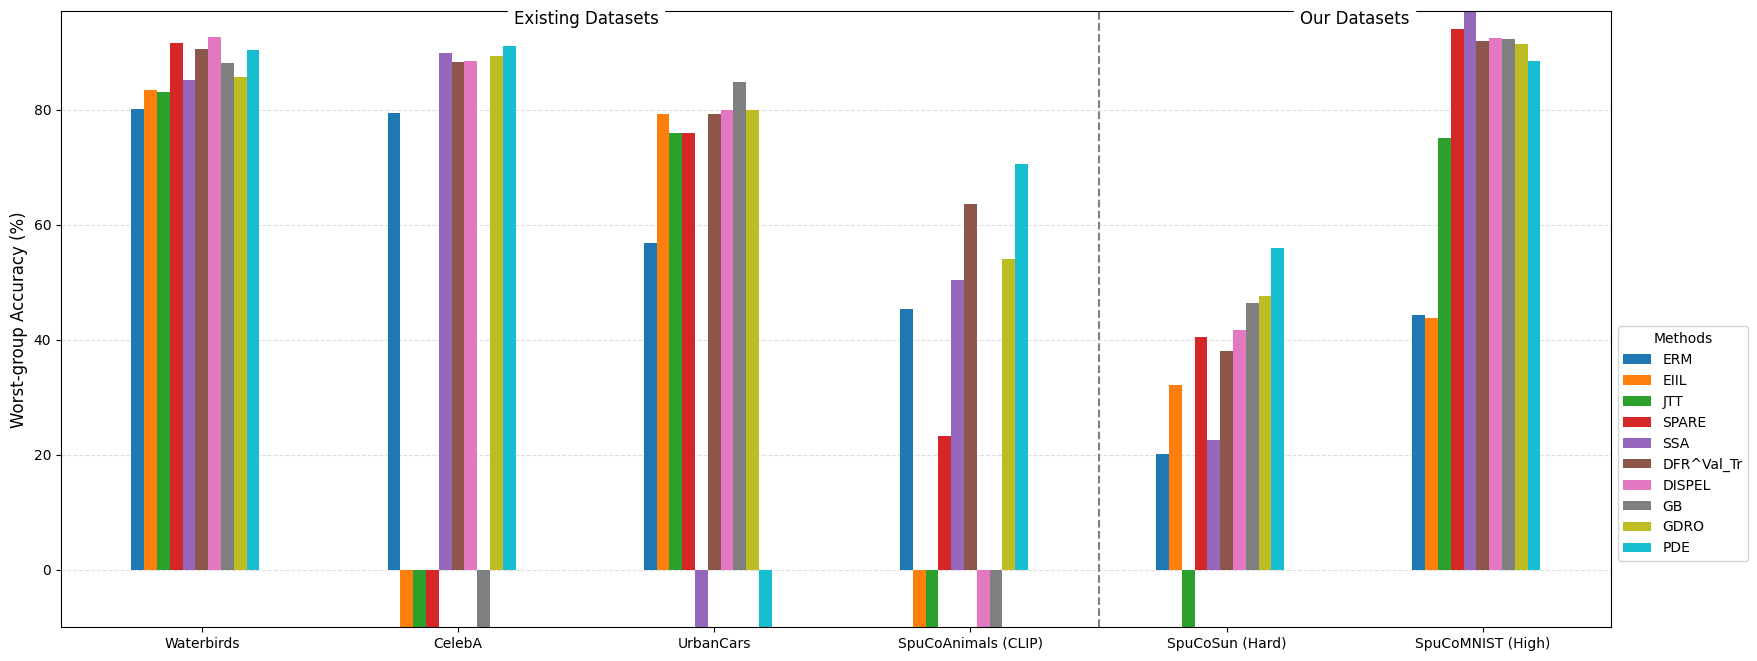

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming dataset_names, method_names, processed_data, and error_data are defined earlier

x = np.arange(len(dataset_names)) # the label locations
num_methods = len(method_names)
width = 0.05  # the width of the bars, adjust if necessary to fit all methods

# Increase the figure size for better visibility
fig, ax = plt.subplots(figsize=(20, 8))

# Plot bars
for i, (attribute, measurement) in enumerate(zip(method_names, processed_data)):
    offset = width * (i - num_methods / 2)
    rects = ax.bar(x + offset, measurement, width, label=attribute)

# Set labels and titles
ax.set_ylabel('Worst-group Accuracy (%)', fontsize=12)
print(x)
ax.set_xticks(x)
ax.set_xticklabels(dataset_names)

# Draw vertical lines for dividers
# Assuming divider_indices is a list of indices where the vertical lines should be drawn
divider_indices = [3.5]  # Change these indices as per your datasets
for idx in divider_indices:
    ax.axvline(x=idx, color='grey', linestyle='--')

# Add text annotations for categories
# Assuming category_positions is a dictionary with categories and their positions
category_positions = {'Existing Datasets': 1.5, 'Our Datasets': 4.5}
for category, pos in category_positions.items():
    ax.text(pos, ax.get_ylim()[1] * 0.95, category, ha='center', va='top', fontsize=12, backgroundcolor='white')

# Add grid only on y-axis and behind the bars
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.set_axisbelow(True)

# Set the y-axis range to include negative values
ax.set_ylim(min(-10, min(np.array(processed_data).flatten())), max(20, max(np.array(processed_data).flatten())))

# Place the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5), title='Methods')
# Show the plot
plt.show()
fig.savefig(f"main_results.pdf", bbox_inches='tight')


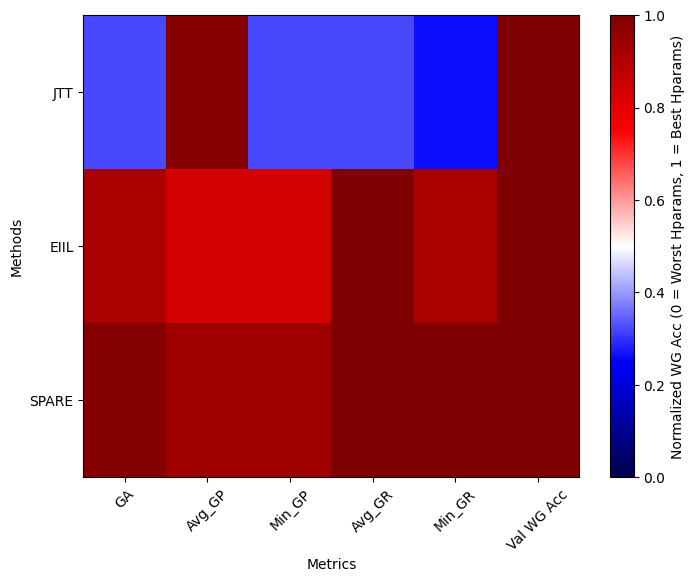

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
data = np.array([
    [21.0, 63.9, 21, 21.0, 17.1, 65.0],
    [77.9, 72.7, 72.7, 83.2, 77.9, 83.2],
    [83.8, 82.5, 82.5, 84.1, 84.1, 84.1]
])

min = [0.0, 20, 60]
max = [65, 83.2, 84.1]

# Create a function to normalize each row separately
def normalize_row(row, min_val, max_val):
    return (row - min_val) / (max_val - min_val)

normalized_data = []
for i, row in enumerate(data):
    normalized_data.append(normalize_row(row, min[i], max[i]))
# Normalize each row separately
normalized_data = np.array(normalized_data)

# Create the heatmap with 'seismic' colormap
plt.figure(figsize=(8, 6))
plt.imshow(normalized_data, cmap='seismic', aspect='auto', vmin=0, vmax=1)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Normalized WG Acc (0 = Worst Hparams, 1 = Best Hparams)')

# Set axis labels and titles
plt.xlabel('Metrics')
plt.ylabel('Methods')

# Show row and column labels
row_labels = ['JTT', 'EIIL', 'SPARE']
col_labels = ['GA', 'Avg_GP', 'Min_GP', 'Avg_GR', 'Min_GR', 'Val WG Acc']
plt.xticks(np.arange(len(col_labels)), col_labels, rotation=45)
plt.yticks(np.arange(len(row_labels)), row_labels)

plt.savefig("gi_tuning.pdf",  bbox_inches='tight')


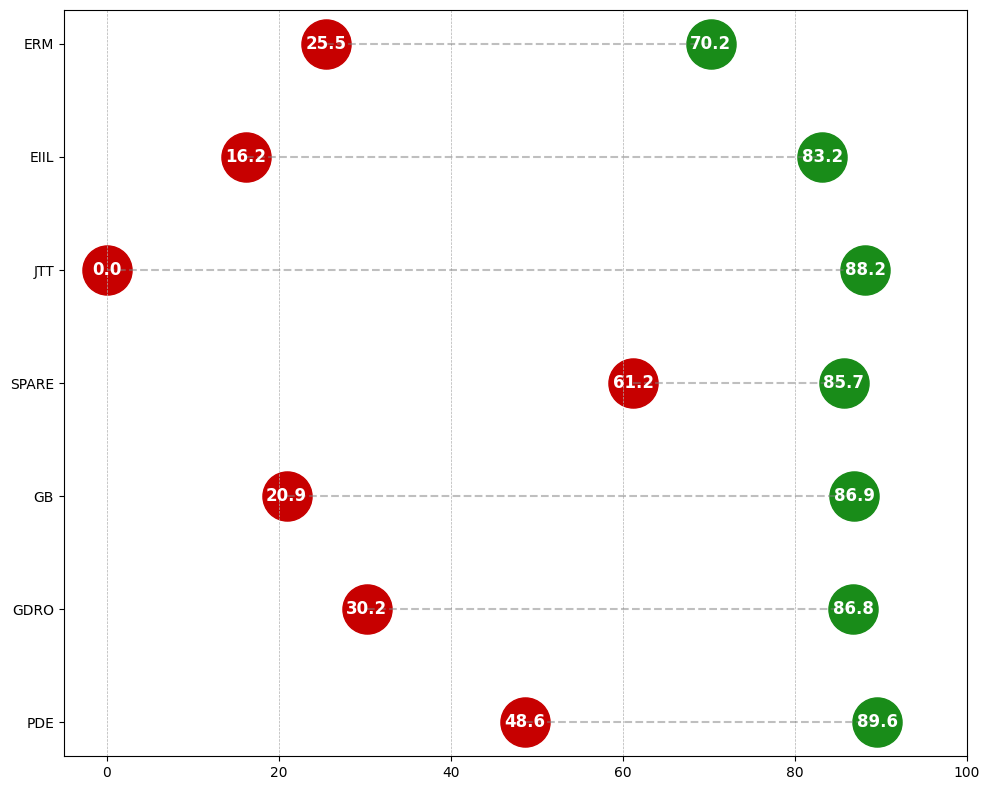

In [98]:
import matplotlib.pyplot as plt

# Data for each school
results_reordered = [[25.5, 70.2], [16.2, 83.2], [0.00, 88.2], [61.2, 85.7], [20.9, 86.9], [30.2, 86.8], [48.6, 89.6]][::-1]
method_names_reordered = ["ERM", "EIIL", "JTT", "SPARE", "GB", "GDRO", "PDE"][::-1]
reorg_data = {}
for i, method_name in enumerate(method_names_reordered):
    reorg_data[method_name] = results_reordered[i]
    
# Define the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# The sizes of the bubbles are assumed to be constant
bubble_size = 1250

# Plotting the bubbles and the lines between them
for i, (school, percentages) in enumerate(reorg_data.items()):
    # Plot the first bubble
    ax.scatter(percentages[0], i, s=bubble_size, color=(199/255, 0, 0, 1))
    ax.text(percentages[0], i, f'{percentages[0]}', fontsize=12, horizontalalignment='center', color="white", verticalalignment='center', weight="bold")
    
    # Plot the second bubble
    ax.scatter(percentages[1], i, s=bubble_size,  color=(25/255, 140/255,25/255))
    ax.text(percentages[1], i, f'{percentages[1]}', fontsize=12, horizontalalignment='center', color="white", verticalalignment='center', weight="bold")
    
    # Draw a line between the bubbles
    ax.plot(percentages, [i, i], color='grey',linestyle='--', alpha=0.5)

# Set the y-axis to display school names
ax.set_yticks(range(len(reorg_data)))
ax.set_yticklabels(reorg_data.keys())

# Set the x-axis limits
ax.set_xlim(-5, 100)

# Add grid
ax.grid(True, which='major', linestyle='--', linewidth=0.5, axis='x')

# Show the plot
plt.tight_layout()
plt.show()
fig.savefig("tuning_single.pdf", bbox_inches="tight")


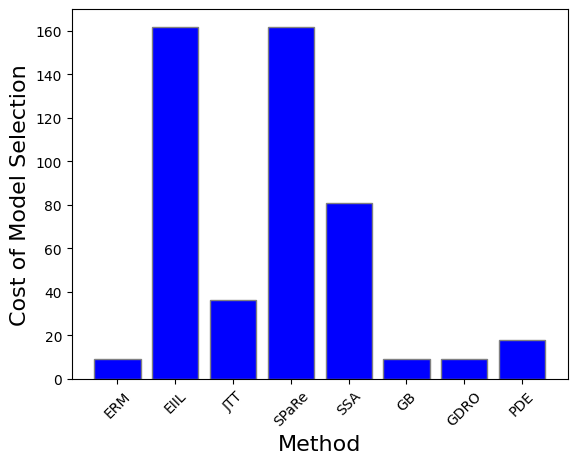

In [186]:
import matplotlib.pyplot as plt

# Adjusted data for only Grid Search Size
methods = ['ERM', 'EIIL', 'JTT', 'SPaRe', 'SSA', 'GB', 'GDRO', 'PDE']
grid_search_sizes = [9, 18*9, 36, 18*9, 9*9, 9, 9, 18]

# Create a simple bar plot
fig, ax = plt.subplots()

# Make the plot
ax.bar(methods, grid_search_sizes, color='b', edgecolor='grey')

# Adding labels
ax.set_xlabel('Method', fontsize=16)
ax.set_ylabel('Cost of Model Selection', fontsize=16)
ax.set_xticks(range(len(methods)))  # This should set the tick locations correctly
ax.set_xticklabels(methods, rotation=45)  # This will rotate the labels to fit better

plt.show()


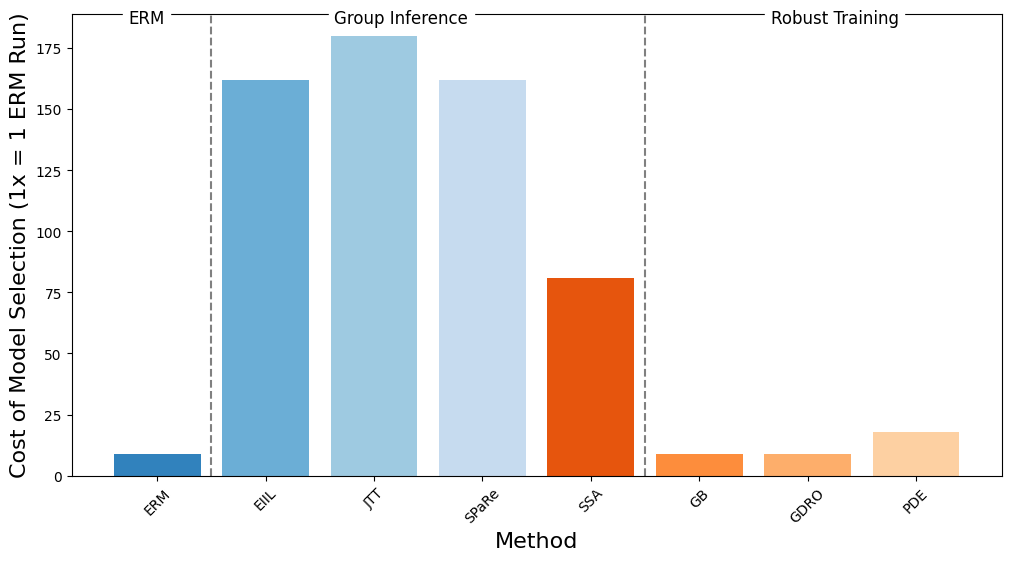

In [213]:
import matplotlib.pyplot as plt
import numpy as np

# Adjusted data for only Grid Search Size
methods = ['ERM', 'EIIL', 'JTT', 'SPaRe', 'SSA', 'GB', 'GDRO', 'PDE']
grid_search_sizes = [9, 18*9, 36*5, 18*9, 9*9, 9, 9, 18]

# Create a taller bar plot by adjusting the figsize
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figsize as needed

# Define colors using 'tab20' colormap
colors = plt.cm.tab20c(np.arange(len(methods)))

# Make the plot
ax.bar(methods, grid_search_sizes, color=colors)

# Adding labels
ax.set_xlabel('Method', fontsize=16)
ax.set_ylabel('Cost of Model Selection (1x = 1 ERM Run)', fontsize=16)
ax.set_xticks(range(len(methods)))  # This should set the tick locations correctly
ax.set_xticklabels(methods, rotation=45)  # This will rotate the labels to fit better

# Draw vertical lines for dividers
divider_indices = [0.5, 4.5]  # Change these indices as per your datasets
for idx in divider_indices:
    ax.axvline(x=idx, color='grey', linestyle='--')

# Add text annotations for categories
category_positions = {'ERM': -0.1, 'Group Inference': 2.25, 'Robust Training': 6.25}
for category, pos in category_positions.items():
    ax.text(pos, ax.get_ylim()[1]*1.01, category, ha='center', va='top', fontsize=12, backgroundcolor='white')

fig.savefig("model_sel_cost.pdf", bbox_inches="tight")
